This notebook is part of the various tests for xanespy. It's intended to allow for visual evaluation of fits, etc.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import os
import xanespy
import numpy as np

from skimage import transform

# Set some directories
SSRL_DIR = 'txm-data-ssrl'
# APS_DIR = os.path.join(TEST_DIR, 'txm-data-aps')
# PTYCHO_DIR = os.path.join(TEST_DIR, 'ptycho-data-als/NS_160406074')

# Importing SSRL Dataset


In [3]:
xanespy.import_ssrl_frameset(directory='ssrl-txm-data/', hdf_filename='imported-ssrl-data.h5')

ValueError: not enough values to unpack (expected 2, got 0)

/home/mwolf/src/xanespy/xanes_frameset.py:1257: UserWarning: use spectrum()
  warnings.warn(UserWarning('use spectrum()'))


fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_current_location
fix gtk_viewer.update_cur

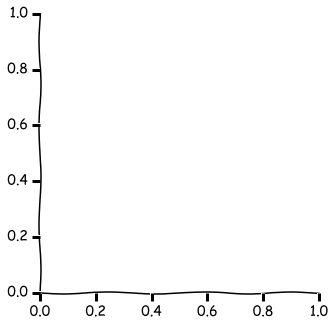

In [2]:
fs = xanespy.XanesFrameset(filename='imported-ssrl-data.h5', edge=xanespy.k_edges['Ni_NCA'])
fs.gtk_viewer()

## Particle Labeling and Segmentation

In [ ]:
fs = get_frame

Center: 8352.3149176
Goodness of fit: 0.002070405398038423


(8340, 8360)

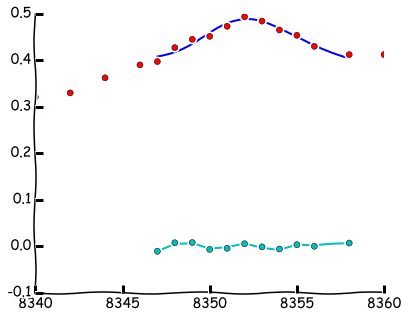

In [2]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum[8347:8358])
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)

# Example Spectrum

KEdgeParams(scale=0.19957229308261382, voffset=0.45036467910755279, E0=8333, sigw=0.5, pre_m=0, pre_b=0, ga=0.96942372458082215, gb=17.0, gc=4)


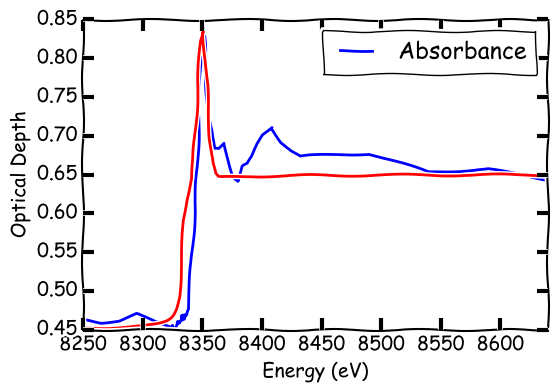

In [35]:
spectrum = pd.read_csv(os.path.join(SSRL_DIR, 'NCA_xanes.csv'),
                               index_col=0, sep=' ', names=['Absorbance'])
spectrum.plot()
plt.ylabel("Optical Depth")
plt.xlabel("Energy (eV)")

p0 = xanespy.xanes_math.guess_kedge(spectrum.values[:,0], energies=spectrum.index, edge=xanespy.k_edges['Ni_NCA'])
print(p0)
Es = np.linspace(8250, 8650, num=200)
# p0 = xanespy.xanes_math.KEdgeParams(scale=0.20, voffset=0.45, E0=8333,
#                                     sigw=0.5, pre_m=0, pre_b=0,
#                                     ga=0.969, gb=17, gc=4)
predicted = xanespy.xanes_math.predict_edge(Es, *p0)
plt.plot(Es, predicted)

/home/mwolf/src/xanespy/xanes_math.py:383: RuntimeWarning: divide by zero encountered in true_divide
  gaus = p.ga*np.exp(-(x-p.gb)**2/2/p.gc**2)


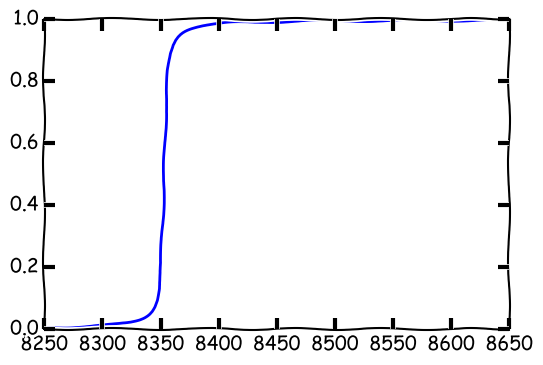